In [1]:
# Step 1: Data Acquisition
import pandas as pd

In [31]:
import pandas as pd

# Step 1: Read the CSV file
data = pd.read_csv('unemployment_data.csv')

# Step 2: Display the entire dataset on the screen
# To display the full dataset, you can simply print the 'data' DataFrame:
print(data)


             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

In [11]:
# Check the column names in the DataFrame
print(data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


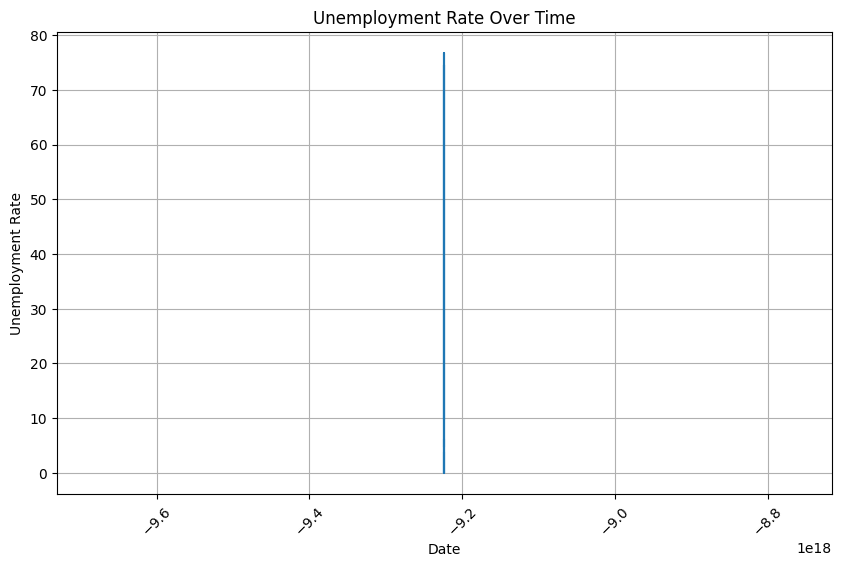

In [16]:
import matplotlib.pyplot as plt

# Remove leading space in column name (if it exists)
data.columns = data.columns.str.strip()

# Convert the 'Date' column to a suitable date/time format (if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Plot the unemployment rates over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Remove leading space in column name (if it exists)
data.columns = data.columns.str.strip()

# Convert the 'Date' column to a suitable date/time format (if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with missing values in the target variable
data.dropna(subset=['Estimated Unemployment Rate (%)'], inplace=True)

# Prepare data for modeling
X = data[['Date']].values
y = data['Estimated Unemployment Rate (%)'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Number of missing values in X:
0
Number of missing values in y:
0
Shape of X: (740, 1)
Shape of y: (740,)
Mean Squared Error: 142.40407073944124


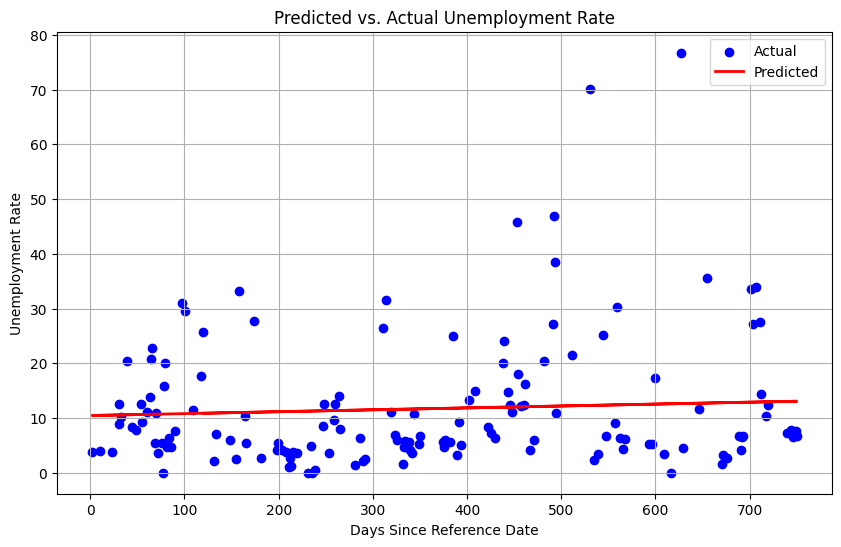

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Remove leading space in column name (if exists)
data.columns = data.columns.str.strip()

# Convert the 'Date' column to a suitable date/time format (if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Calculate the number of days since a reference date
reference_date = data['Date'].min()
data['Days_Since_Reference'] = (data['Date'] - reference_date).dt.days

# Prepare data for modeling
X = data.index.values.reshape(-1, 1)
y = data['Estimated Unemployment Rate (%)'].values

# Check for missing values in X and y
print("Number of missing values in X:")
print(pd.isnull(X).sum())
print("Number of missing values in y:")
print(pd.isnull(y).sum())

# Handle missing values in y
y_imputer = SimpleImputer(strategy='mean')
y = y_imputer.fit_transform(y.reshape(-1, 1)).flatten()

# Check data shape after handling missing values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the unemployment rate for the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the model's predictions
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Predicted vs. Actual Unemployment Rate')
plt.xlabel('Days Since Reference Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


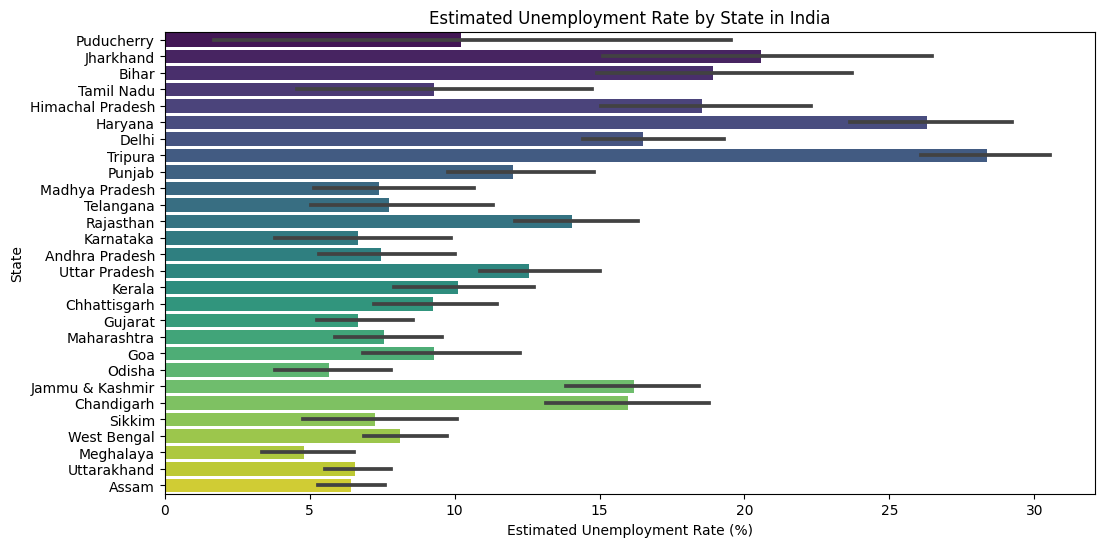

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the CSV file
data = pd.read_csv('unemployment_data.csv')

# Step 1a: Check the actual column names in the dataset
print(data.columns)

# Step 1b: Remove whitespace from column names (if any)
data.columns = data.columns.str.strip()

# Step 2: Sort the data by 'Estimated Unemployment Rate (%)' in descending order to get highest first
if 'Estimated Unemployment Rate (%)' in data.columns:
    sorted_data = data.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)
else:
    raise KeyError("Column 'Estimated Unemployment Rate (%)' not found in the dataset.")

# Step 3: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=sorted_data, palette='viridis')
plt.title('Estimated Unemployment Rate by State in India')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('State')
plt.show()
